In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [21]:
# Assuming you have a dataset of birth weights called 'birth_weights'
# For demonstration purposes, we'll create a sample dataset
np.random.seed(42)  # For reproducibility
mu, sigma = 7.5, 1.5  # Example mean and standard deviation
birth_weights = np.random.normal(mu, sigma, 100)

In [22]:
# Step 1: Sort the values in the sample
sorted_birth_weights = np.sort(birth_weights)

In [23]:
# Step 2: Generate a random sample from a standard normal distribution
# with the same size as the sample, and sort it.
standard_normal_sample = np.random.normal(0, 1, len(birth_weights))
sorted_standard_normal = np.sort(standard_normal_sample)

In [24]:
def MakeNormalPlot(weights):
    """
    Generates a normal probability plot and overlays a normal distribution line.

    Args:
        weights: A numpy array or list of numerical data.
    """
    mean = np.mean(weights)
    std = np.std(weights)
    xs = np.linspace(min(weights), max(weights), 100)

    plt.figure(figsize=(8, 6))
    stats.probplot(weights, plot=plt)
    plt.title('Normal Q-Q Plot with Normal Distribution Line')

    ys = stats.norm.pdf(xs, mean, std)
    ys_scaled = ys * len(weights) * (max(weights) - min(weights)) / (max(ys) * 4)
    plt.plot(xs, mean + std * stats.norm.ppf(stats.norm.cdf(xs, mean, std)), 'r-', label='Normal Distribution')
    plt.legend()
    plt.show()

In [25]:
# Sample adult weight data (log-normally distributed)
np.random.seed(42)
mu_log, sigma_log = 4.5, 0.8  # Parameters for the underlying normal distribution of the log
adult_weights = np.random.lognormal(mu_log, sigma_log, 1000)

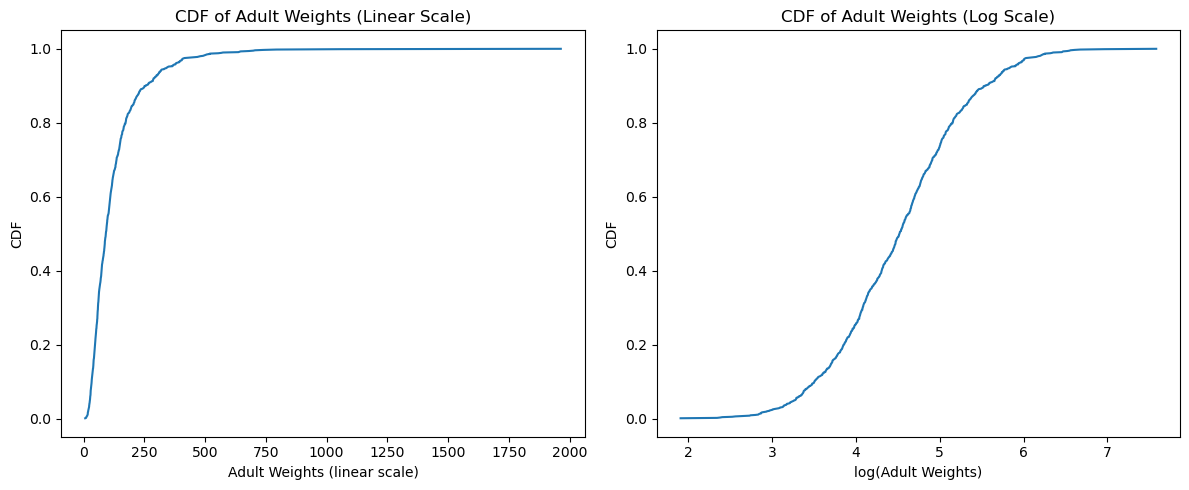

In [26]:
# CDF Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sorted_weights = np.sort(adult_weights)
cdf = np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)
plt.plot(sorted_weights, cdf)
plt.xlabel('Adult Weights (linear scale)')
plt.ylabel('CDF')
plt.title('CDF of Adult Weights (Linear Scale)')

plt.subplot(1, 2, 2)
plt.plot(np.log(sorted_weights), cdf)
plt.xlabel('log(Adult Weights)')
plt.ylabel('CDF')
plt.title('CDF of Adult Weights (Log Scale)')

plt.tight_layout()
plt.show()

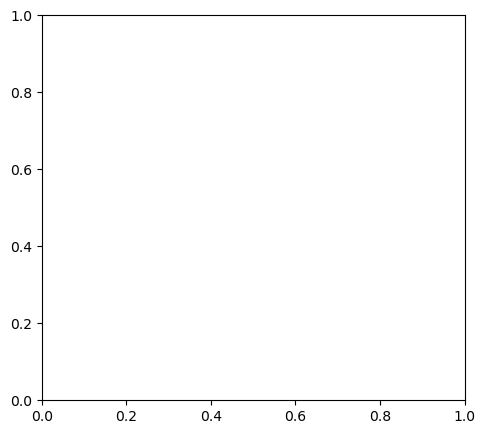

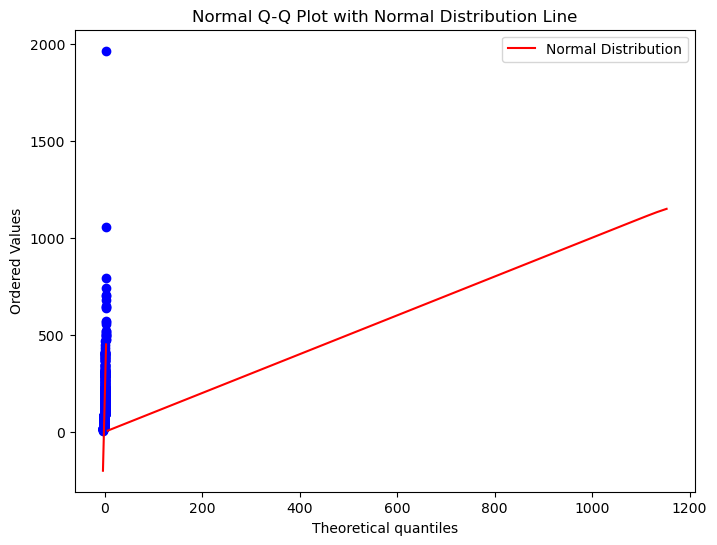

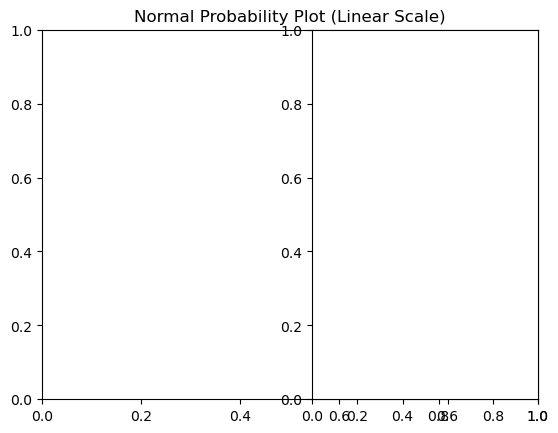

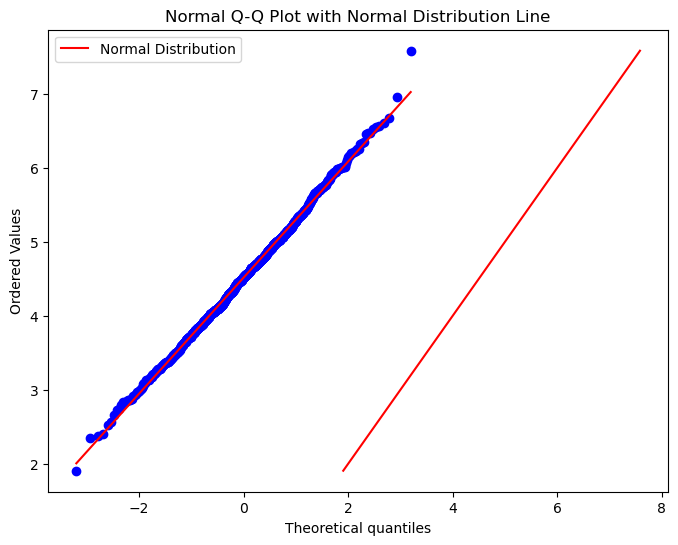

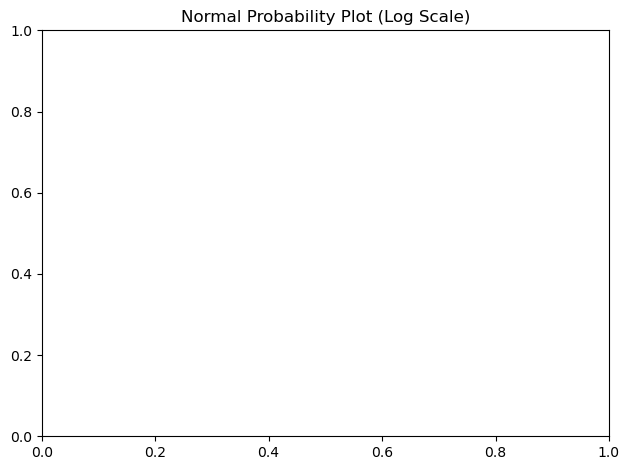

In [27]:
# Normal Probability Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
MakeNormalPlot(adult_weights)
plt.title('Normal Probability Plot (Linear Scale)')

plt.subplot(1, 2, 2)
MakeNormalPlot(np.log(adult_weights))
plt.title('Normal Probability Plot (Log Scale)')

plt.tight_layout()
plt.show()

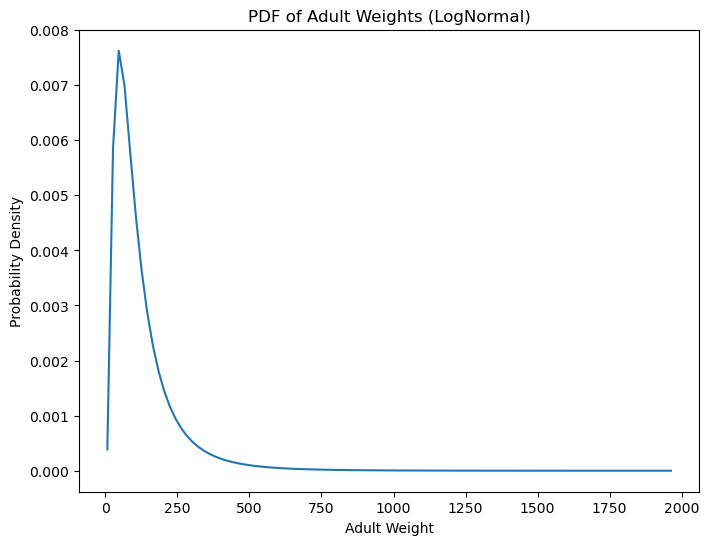

In [28]:
#PDF Plot
plt.figure(figsize=(8,6))
x = np.linspace(min(adult_weights), max(adult_weights),100)
pdf = stats.lognorm.pdf(x, sigma_log, scale=np.exp(mu_log))
plt.plot(x,pdf)
plt.title("PDF of Adult Weights (LogNormal)")
plt.xlabel("Adult Weight")
plt.ylabel("Probability Density")
plt.show()